In [81]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

hd=pd.read_csv("..\data/heart-disease.csv")

In [82]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [83]:
X=hd.drop("target",axis=1)
Y=hd["target"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8688524590163934

In [84]:
pred=clf.predict(x_test)

In [85]:
pr=np.array([y_test])

In [86]:
np.mean(pred==pr)

0.8688524590163934

In [87]:
ppove=clf.predict_proba(x_test)

In [88]:
ppove[:5]

array([[0.24, 0.76],
       [0.92, 0.08],
       [0.14, 0.86],
       [0.95, 0.05],
       [0.11, 0.89]])

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8688524590163934

In [90]:
from sklearn.datasets import load_boston
boston=load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [91]:
bdf=pd.DataFrame(boston["data"],columns=boston["feature_names"])
bdf["target"]=pd.Series(boston["target"])
bdf.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [92]:
from sklearn.model_selection import cross_val_score

cvs=cross_val_score(clf,X,y)
np.mean(cvs),clf.score(x_test,y_test)

(0.8117486338797815, 0.8688524590163934)

In [93]:
pp=clf.predict_proba(x_test)
p=clf.predict(x_test)

In [94]:
p[:10]


array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [95]:
pp[:10]

array([[0.24, 0.76],
       [0.92, 0.08],
       [0.14, 0.86],
       [0.95, 0.05],
       [0.11, 0.89],
       [0.07, 0.93],
       [0.2 , 0.8 ],
       [0.64, 0.36],
       [0.09, 0.91],
       [0.27, 0.73]])

In [96]:
pp_positive=pp[:,1] 

In [97]:
pp_positive[:5]

array([0.76, 0.08, 0.86, 0.05, 0.89])

In [98]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,pp_positive)

In [99]:
fpr

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.04, 0.04, 0.04, 0.08,
       0.08, 0.08, 0.12, 0.12, 0.16, 0.16, 0.16, 0.2 , 0.24, 0.24, 0.28,
       0.32, 0.48, 0.48, 0.6 , 0.64, 0.72, 0.76, 1.  ])

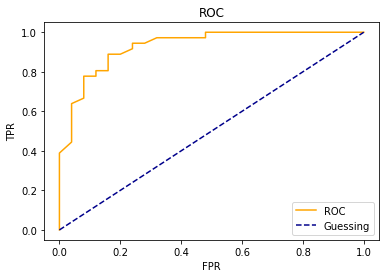

In [100]:
import matplotlib.pyplot as plt
def plot_roc_corve(fpt,tpr):
    plt.plot(fpr,tpr,color="orange",label="ROC")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC")
    plt.legend()
    plt.show()
plot_roc_corve(fpr,tpr)

In [101]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,pp_positive)

0.9294444444444444

In [102]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,pp_positive)

0.9294444444444444

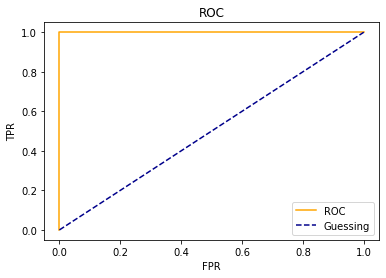

In [103]:
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_corve(fpr,tpr)

In [104]:
fpr

array([0., 0., 1.])

In [105]:
tpr

array([0., 1., 1.])

In [106]:
thresholds

array([2, 1, 0], dtype=int64)

In [107]:
roc_auc_score(y_test,y_test)

1.0

In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[19,  6],
       [ 2, 34]], dtype=int64)

In [110]:
pd.crosstab(y_test,pred,rownames=["Actual Label"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,19,6
1,2,34


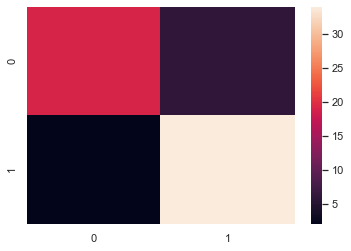

In [118]:
import seaborn as sns

sns.set(font_scale=1.0)
conf_mat=confusion_matrix(y_test,pred)
sns.heatmap(conf_mat);

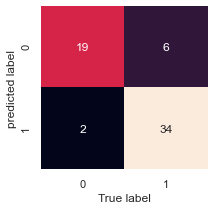

In [123]:
def plot_conf_mat(conf_mat):
    """plots a confusion matrix using Seaborn's heatmap()."""
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,annot=True,# Annotate the boxes with conf_mat info
                   cbar=False)
    plt.xlabel("True label")
    plt.ylabel("predicted label")
    #bottom,top=ax.get_ylim()
    #ax.set_ylim(bottom + 0.5,top-0.5);
plot_conf_mat(conf_mat)

In [124]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        25
           1       0.85      0.94      0.89        36

    accuracy                           0.87        61
   macro avg       0.88      0.85      0.86        61
weighted avg       0.87      0.87      0.87        61

